In [ ]:
## Install Tensorflow and Matplotlib
%pip install tensorflow
%pip install matplotlib

In [3]:
# Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [4]:
# Data Paths
train_data_dir = '../data/pepsico_dataset/Train/'
test_data_dir = '../data/pepsico_dataset/Test/'

In [5]:
# Set batch size and image size
batch_size = 32
image_size = (250, 250)

In [6]:
# Preprocessing images by rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [7]:
# Creating train/test generators for binary classification
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
)

Found 769 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


In [8]:
# Neural network architecture for the sequential model
model = Sequential() # Create sequential model
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3), activation='relu')) # CNN Input layer // 32 filters
model.add(MaxPooling2D((2, 2))) # Downsizing sample
model.add(Conv2D(64, (3, 3), activation='relu')) # 64 Filters
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) # 128 Filters
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # Converting from 2D to 1D vector
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # CNN Output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Model checkpoint
checkpoint_filepath = 'keras_checkpoint.h5'  # Change the filename as needed
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',  # You can change this to 'val_loss' or another metric
    save_best_only=True,
    mode='max',  # Use 'min' for loss, 'max' for accuracy
    verbose=1
)

In [9]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[model_checkpoint]
)

Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 0.8714 - accuracy: 0.6372
Epoch 1: val_accuracy improved from -inf to 0.48958, saving model to model_checkpoint.h5


C:\Users\deepk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 92s 4s/step - loss: 0.8714 - accuracy: 0.6372 - val_loss: 1.0179 - val_accuracy: 0.4896
Epoch 2/5
25/25 [==============================] - ETA: 0s - loss: 0.1597 - accuracy: 0.9415
Epoch 2: val_accuracy improved from 0.48958 to 0.99479, saving model to model_checkpoint.h5
25/25 [==============================] - 79s 3s/step - loss: 0.1597 - accuracy: 0.9415 - val_loss: 0.0246 - val_accuracy: 0.9948
Epoch 3/5
25/25 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9792
Epoch 3: val_accuracy did not improve from 0.99479
25/25 [==============================] - 79s 3s/step - loss: 0.0708 - accuracy: 0.9792 - val_loss: 0.0926 - val_accuracy: 0.9740
Epoch 4/5
25/25 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9922
Epoch 4: val_accuracy did not improve from 0.99479
25/25 [==============================] - 78s 3s/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0184 - val_accuracy: 0.9948
Epoch 5/5
2

In [10]:
# Load best model results
model.load_weights(checkpoint_filepath)

In [11]:
# Results
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

6/6 [==============================] - 10s 2s/step - loss: 0.0246 - accuracy: 0.9948
Test Accuracy: 0.9947916865348816
Test Accuracy: 0.024646861478686333


In [12]:
# Printing keys to use for plotting
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


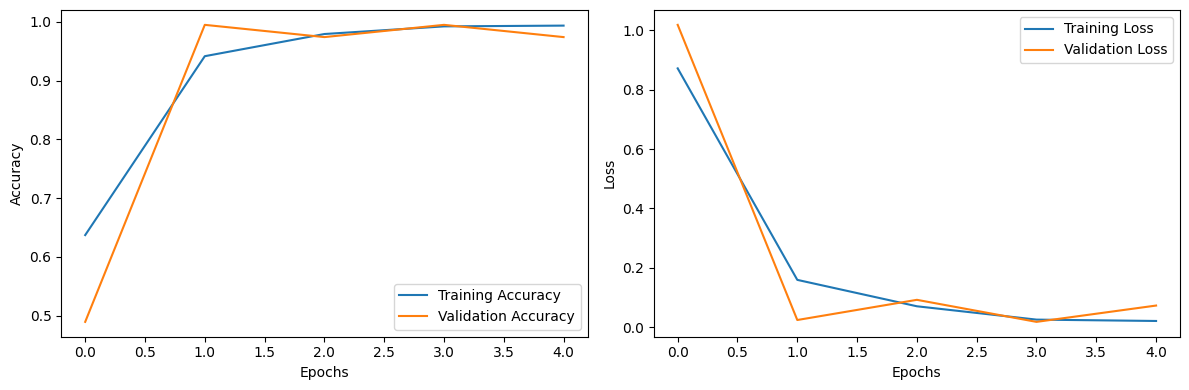

In [13]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

# Check if accuracy is in the history
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')

# Check if val_accuracy is in the history
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()